In [1]:
# https://github.com/siglimumuni/Machine_Learning_with_Python/blob/main/KMeans%20Clustering%20Project.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
college = pd.read_csv("https://raw.githubusercontent.com/goldenfingaz/Datasets/master/College_Data")

In [3]:
college = college.set_index(college.columns[0])
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

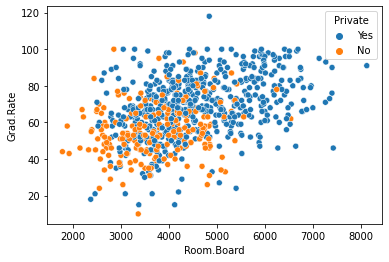

In [6]:
# Grad.Rate versus Room.Board where the points are colored by the Private column
sns.scatterplot(data=college,x='Room.Board',y='Grad.Rate',hue='Private')

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

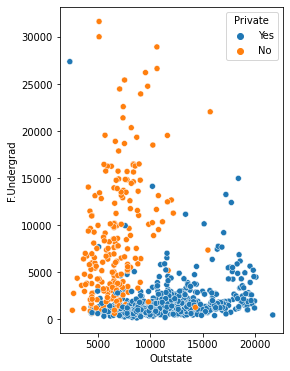

In [7]:
# Histogram showing Out of State Tuition based on the Private column
plt.figure(figsize=[4,6])
sns.scatterplot(data=college,x='Outstate',y='F.Undergrad',hue='Private')

<AxesSubplot:ylabel='Frequency'>

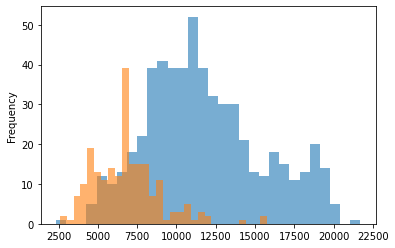

In [8]:
college[college['Private']=='Yes']['Outstate'].plot(kind='hist',bins=30,alpha=0.6)
college[college['Private']=='No']['Outstate'].plot(kind='hist',bins=30,alpha=0.6)

In [9]:
college[college['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
college['Grad.Rate'] = college['Grad.Rate'].replace(118,100)

<AxesSubplot:ylabel='Frequency'>

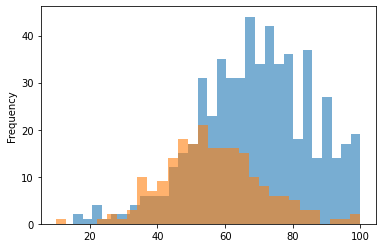

In [11]:
college[college['Private']=='Yes']['Grad.Rate'].plot(kind='hist',bins=30,alpha=0.6)
college[college['Private']=='No']['Grad.Rate'].plot(kind='hist',bins=30,alpha=0.6)

In [18]:
# K Means Cluster Creation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init="auto")

In [19]:
kmeans.fit(college.drop('Private',axis=1))

KMeans(n_clusters=2, n_init='auto')

In [20]:
kmeans.cluster_centers_

array([[1.00510097e+04, 6.69110680e+03, 2.71795146e+03, 3.35825243e+01,
        6.42524272e+01, 1.41367961e+04, 2.89586408e+03, 8.76658252e+03,
        4.25179612e+03, 5.84864078e+02, 1.84860194e+03, 8.37281553e+01,
        8.92524272e+01, 1.59844660e+01, 1.65242718e+01, 1.01307379e+04,
        6.20776699e+01],
       [1.92436053e+03, 1.30478783e+03, 4.83813056e+02, 2.66379822e+01,
        5.45044510e+01, 2.10495252e+03, 5.43461424e+02, 1.06965015e+04,
        4.37368398e+03, 5.43958457e+02, 1.26301632e+03, 7.09688427e+01,
        7.82433234e+01, 1.38001484e+01, 2.36943620e+01, 9.58825964e+03,
        6.59540059e+01]])

In [21]:
dic = {'Yes':1,'No':0}
college['Cluster'] = college['Private'].map(dic)

In [22]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(college['Cluster'],kmeans.labels_))
print(classification_report(college['Cluster'],kmeans.labels_))

[[ 89 123]
 [ 14 551]]
              precision    recall  f1-score   support

           0       0.86      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.82       777
   macro avg       0.84      0.70      0.73       777
weighted avg       0.83      0.82      0.80       777

